In [ ]:
!nvidia-smi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 24.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="secret_key")
project = rf.workspace("caio-ygfyx").project("placass")
version = project.version(1)
dataset = version.download("yolov8")


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=150 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 263MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/placass-1/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

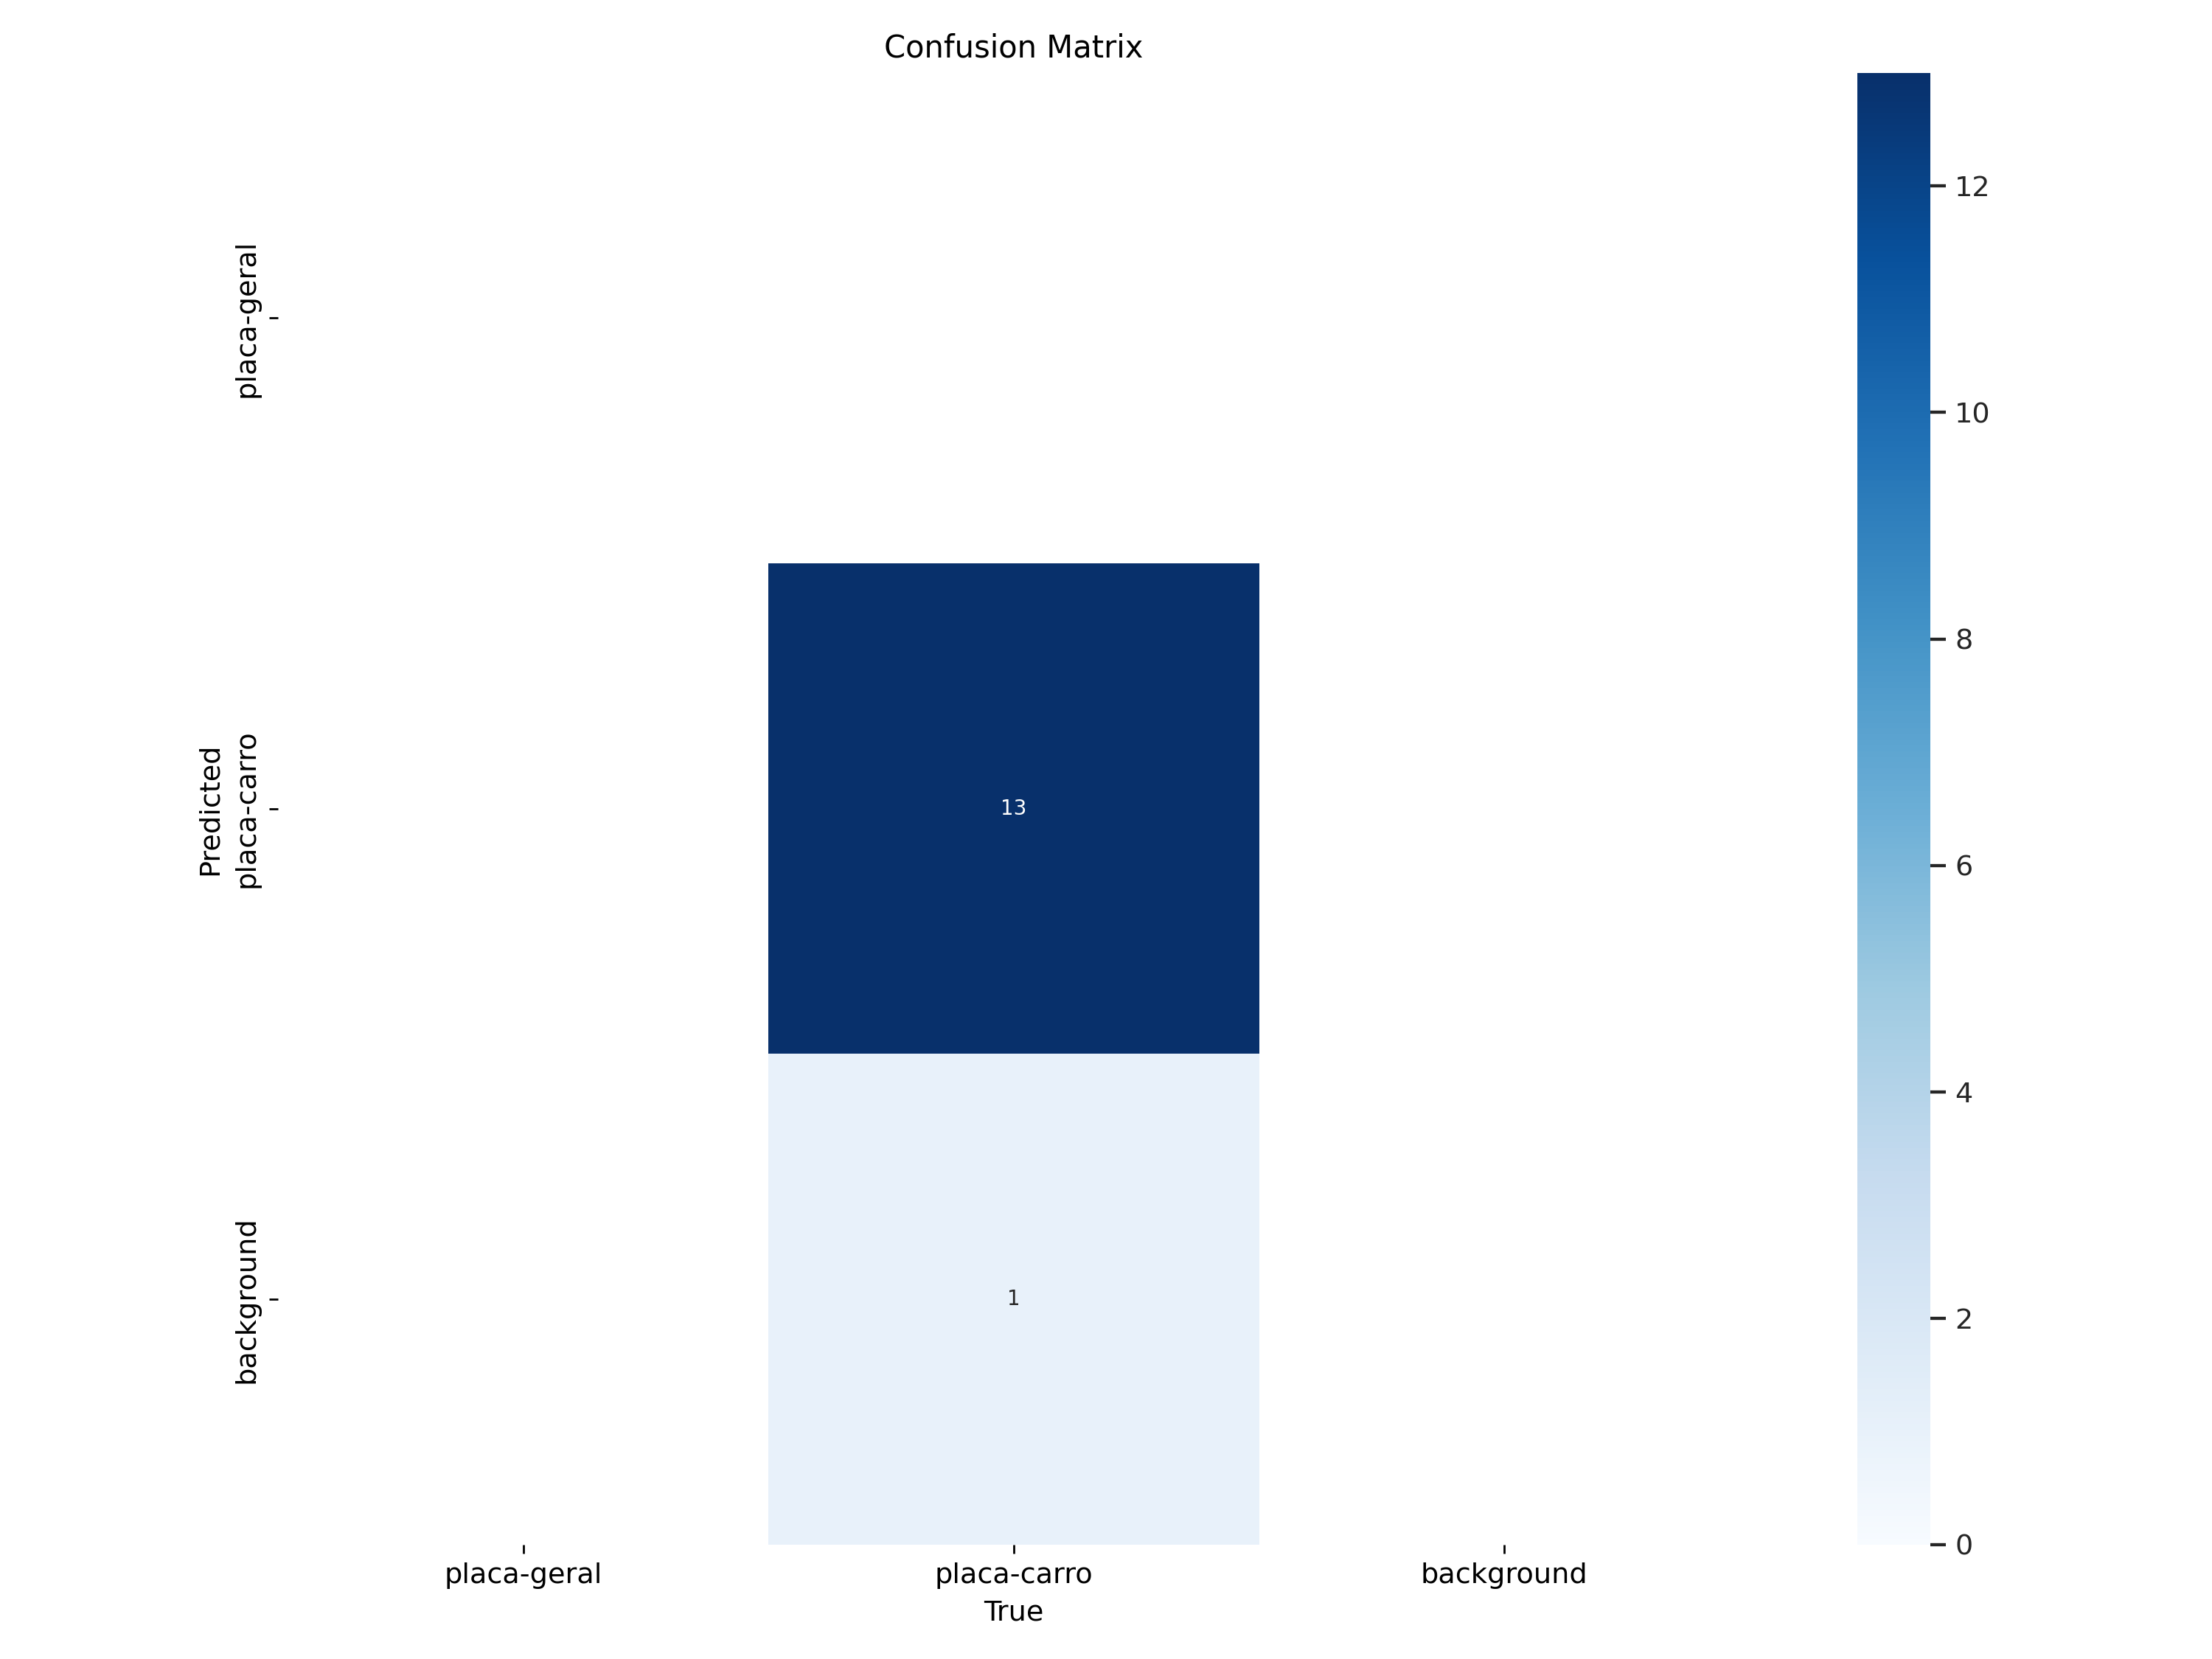

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

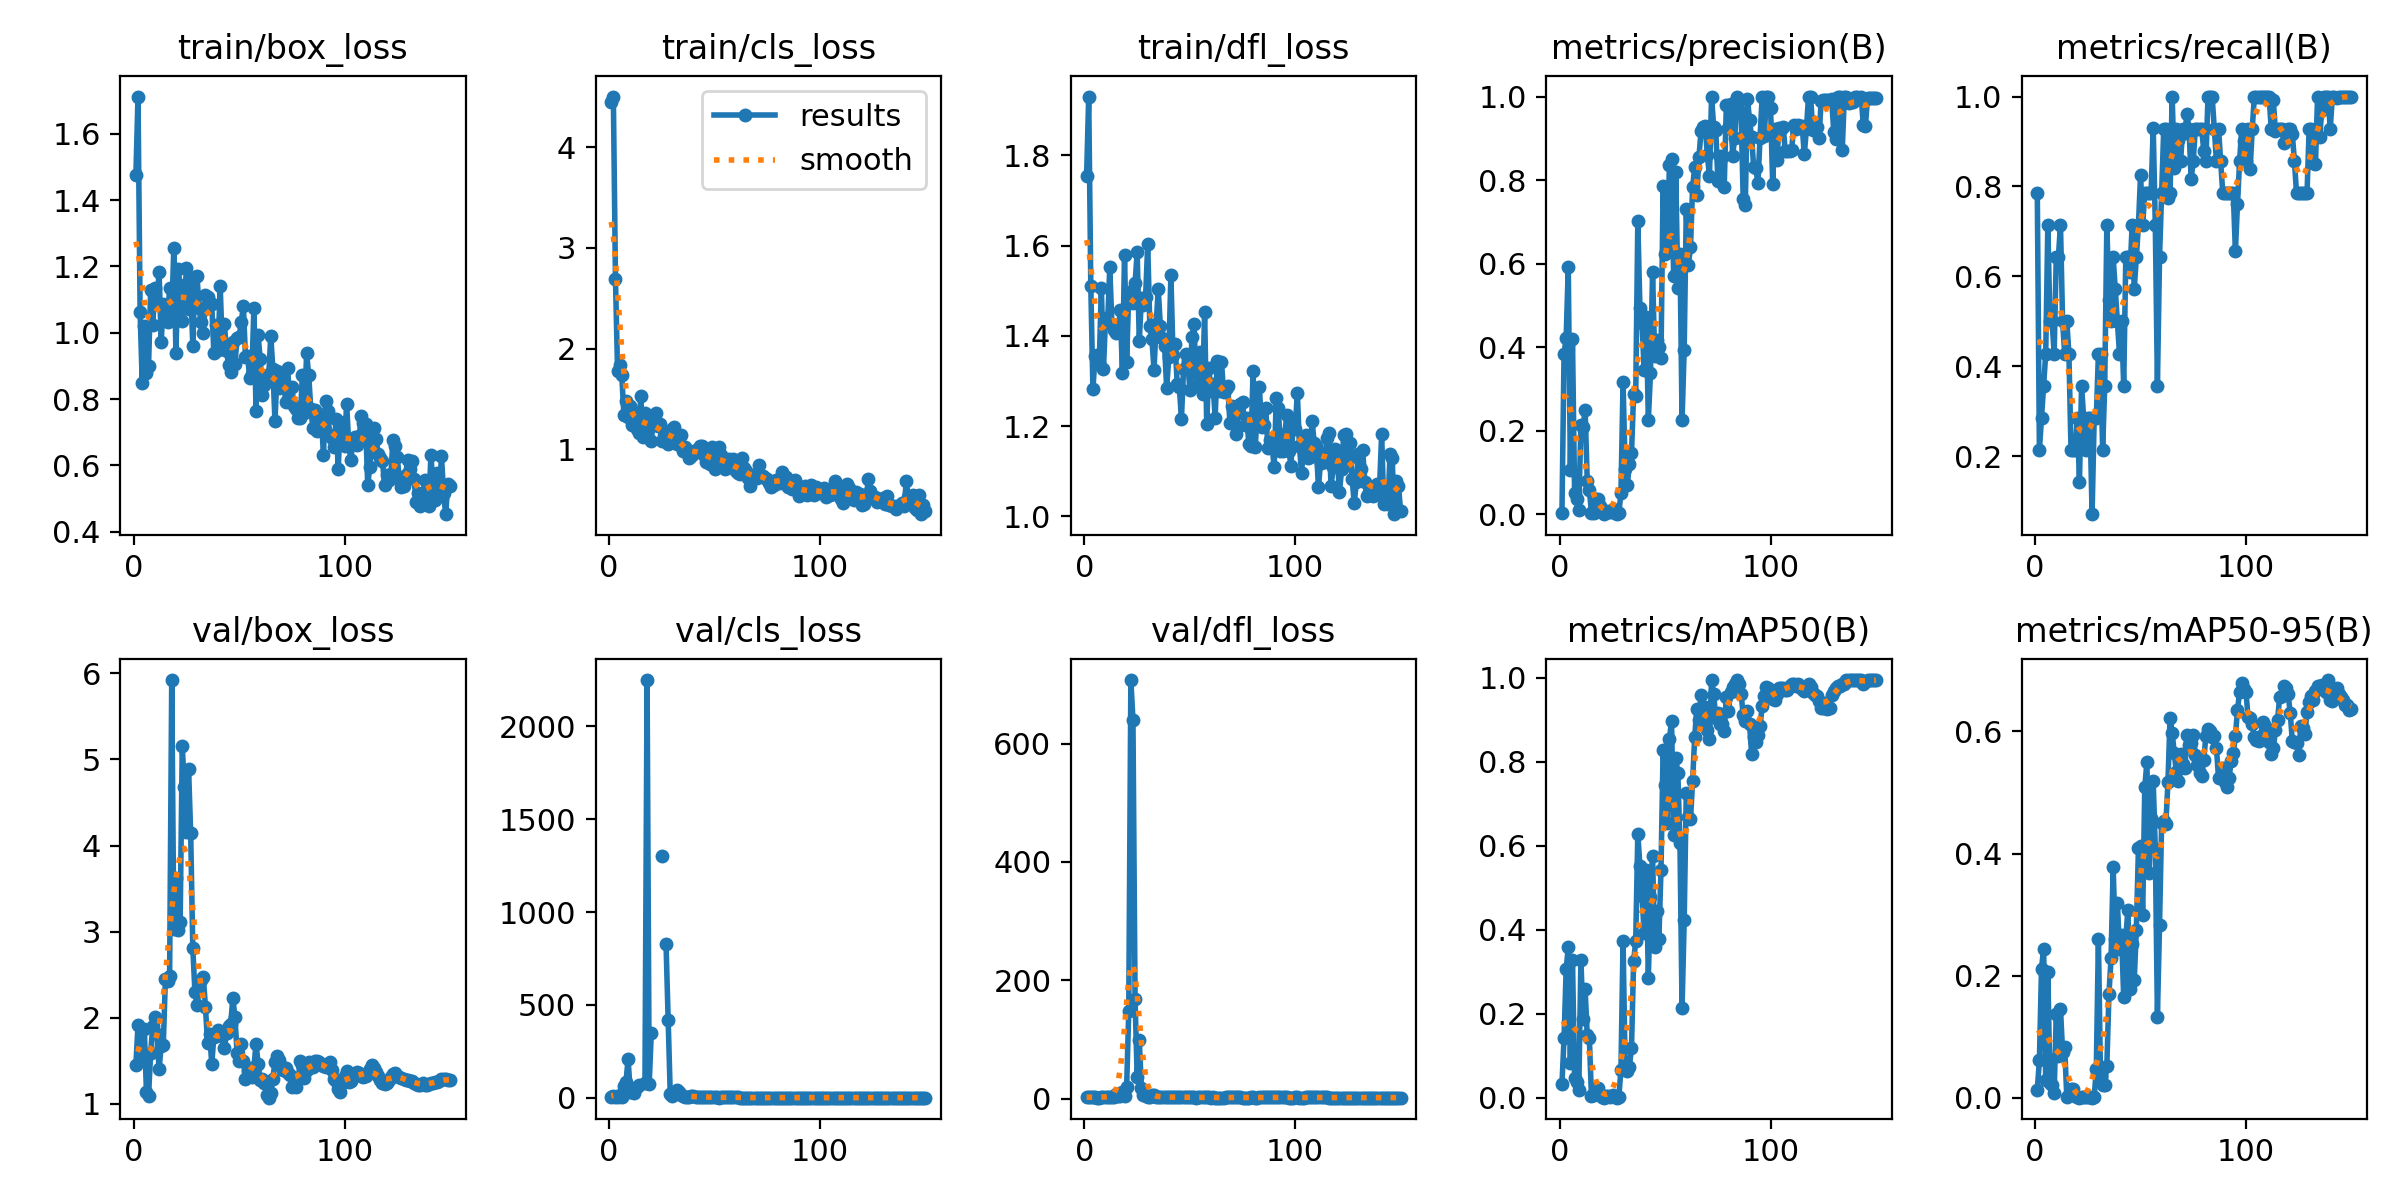

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/placass-1/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.37s/it]
                   all         14         14      0.988          1      0.995      0.665
           placa-carro         14         14      0.988          1      0.995      0.665
Speed: 0.2ms preprocess, 26.6ms inference, 0.0ms loss, 49.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/8 /content/placass-1/test/images/1-7_jpeg.rf.7e04c7270dd9de2008d50599942cf673.jpg: 640x640 2 placa-carros, 37.0ms
image 2/8 /content/placass-1/test/images/3-6_jpg.rf.e4ed32963819b89262707af893c7fcbf.jpg: 640x640 1 placa-carro, 37.0ms
image 3/8 /content/placass-1/test/images/6-1_jpg.rf.680d241d7271e5e42114a21dc26f1818.jpg: 640x640 1 placa-carro, 36.9ms
image 4/8 /content/placass-1/test/images/WhatsApp-Image-2024-06-17-at-17-24-39-2-Copia_jpeg.rf.2b2396ff15ae93b7ea8bf9d184ce18d9.jpg: 640x640 1 placa-carro, 35.1ms
image 5/8 /content/placass-1/test/images/WhatsApp-Image-2024-06-17-at-17-24-39-3-Copia_jpeg.rf.89f8d93e76351b86d4c05fe6edb421b5.jpg: 640x640 1 placa-carro, 33.9ms
image 6/8 /content/placass-1/test/images/WhatsApp-Image-2024-06-20-at-11-42-29-2-_jpeg.rf.dc8736896e1d44b3ece95d809b6b798b.jpg: 640x640 2 placa-ca

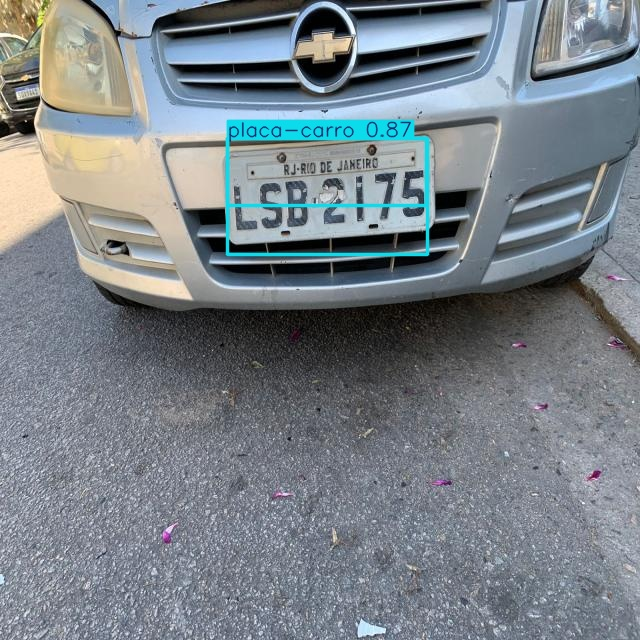

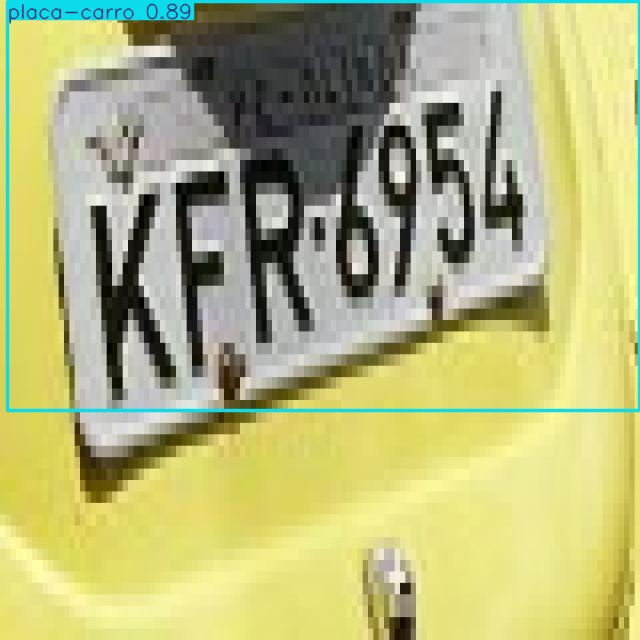

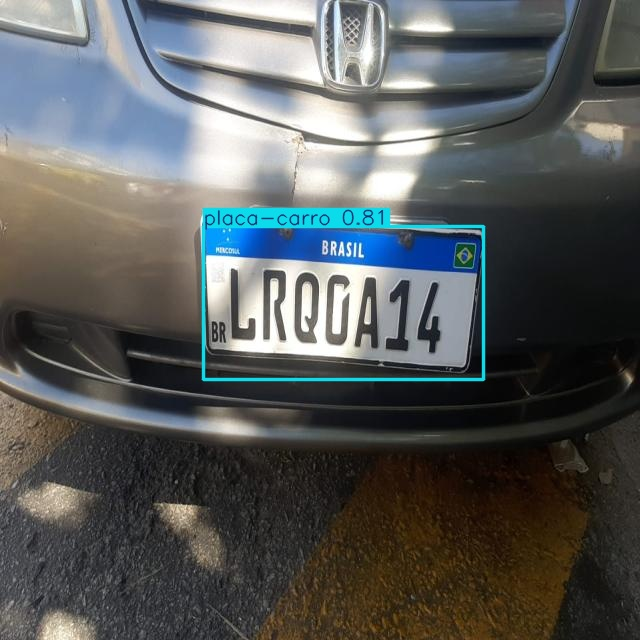

In [10]:
import glob
from IPython.display import Image, display

for imPath in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=imPath))
  print("\n")

In [11]:
import shutil

shutil.make_archive('/content/model_trained', 'zip', '/content/runs/detect/train/')

'/content/model_trained.zip'